# 3章

In [11]:
# minimal imports
import pandas as pd
import numpy as np
from plotnine import *
import plotnine.options as p9options

# for graphical enhancement
from mizani.labels import label_date, label_dollar, label_percent, label_comma

p9options.figure_size = (6.4, 4.8)
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

In [12]:
# dataset packages
from gapminder import gapminder

## 図 3.3

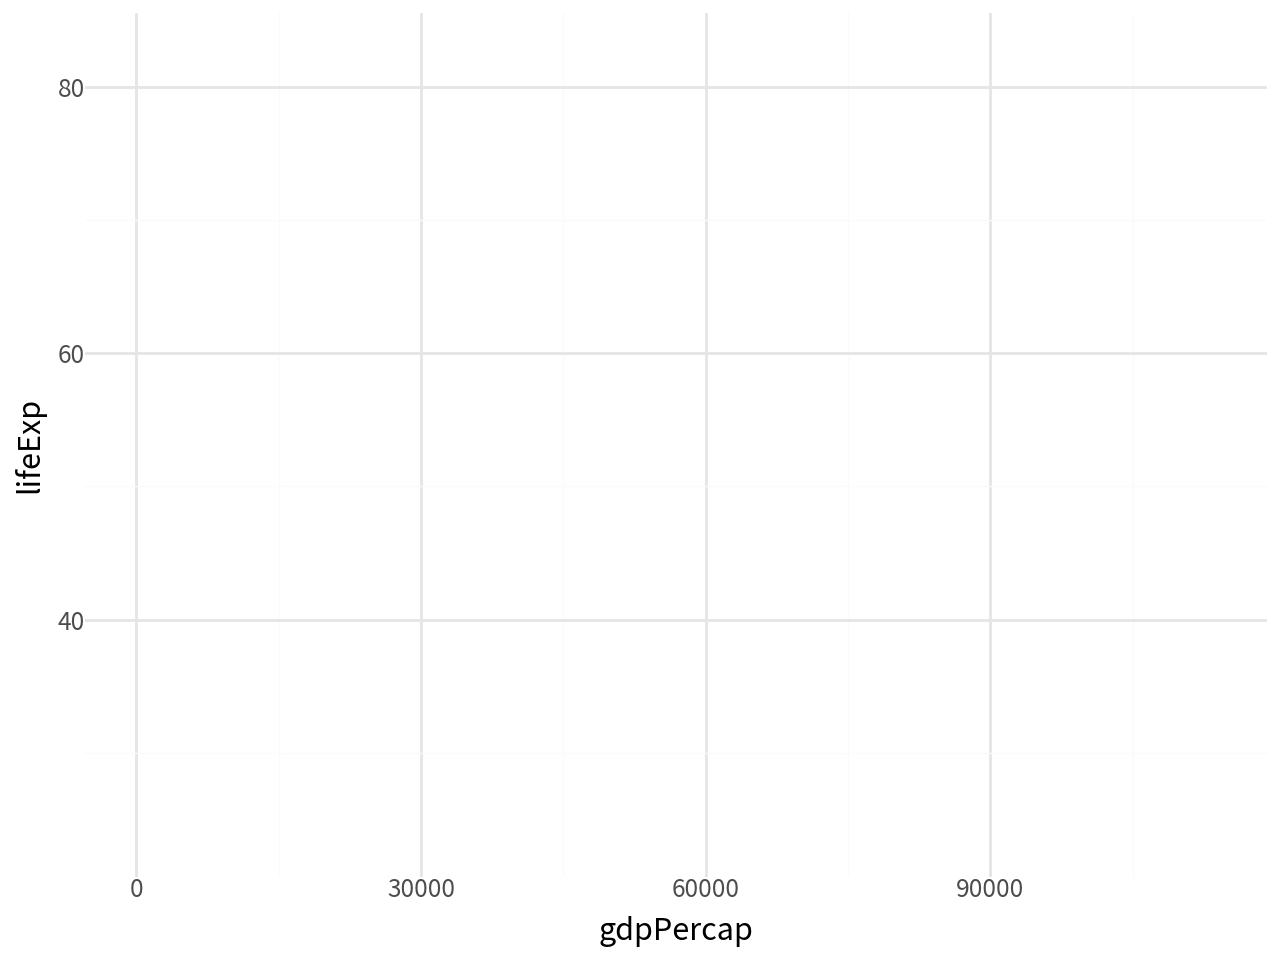

In [13]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p

## 図 3.4

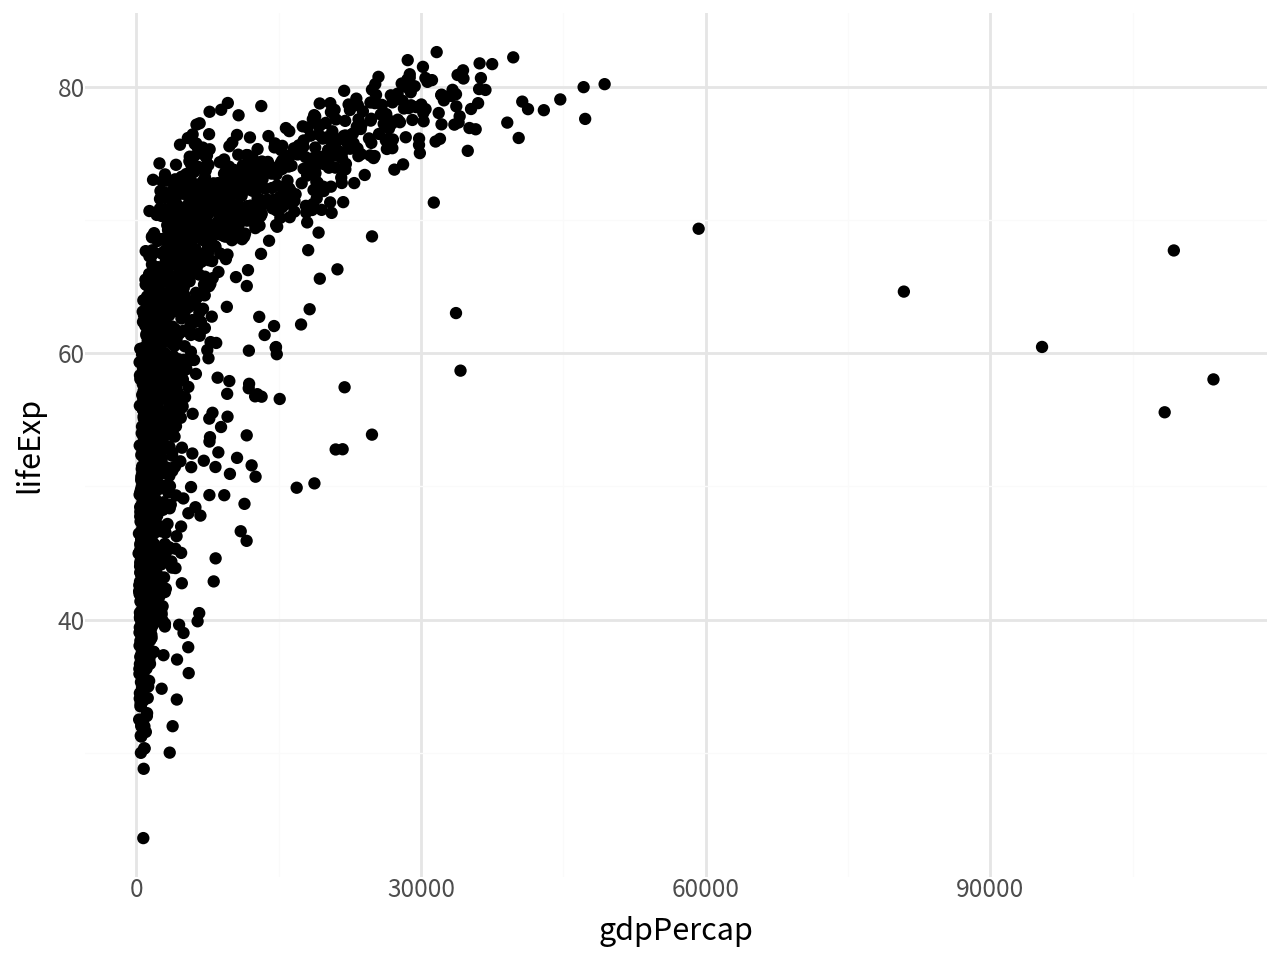

In [14]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p + geom_point()

## 図 3.5

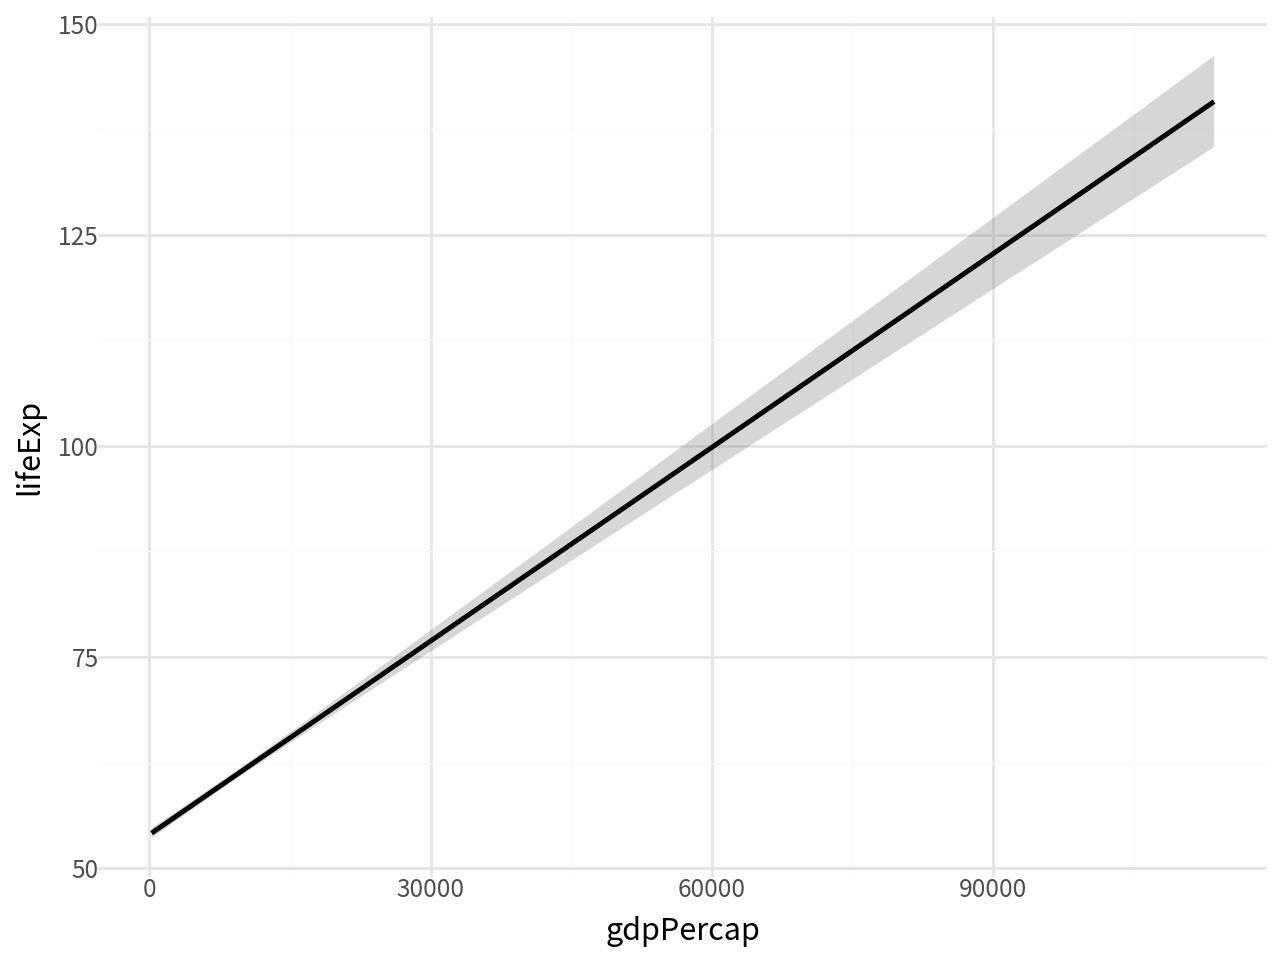

In [15]:
p = ggplot(gapminder, aes(x='gdpPercap', y='lifeExp'))
p + geom_smooth()

## 図 3.6

注 1: Plotnine は現在 (v0.8), `geom_smooth` 関数で一般化加法モデル (GAM) をサポートしてません. ここでは代わりに LOESS を使用します.

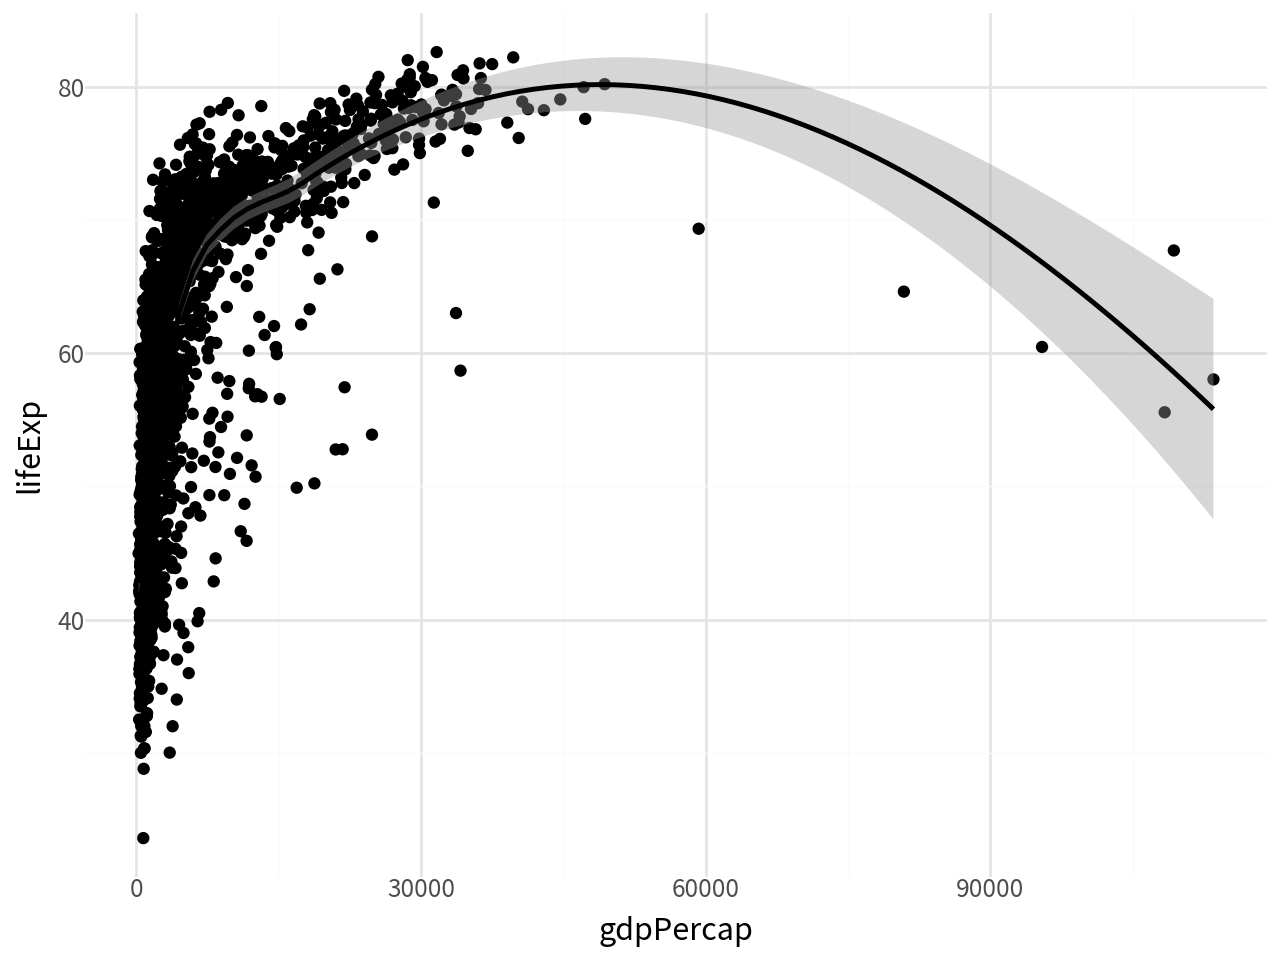

In [16]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth(method='loess')

注 2: もしどうしても GAM を使用してプロットしたいなら, **statsmodels** から GAM のクラスをインポートして使うことができます.

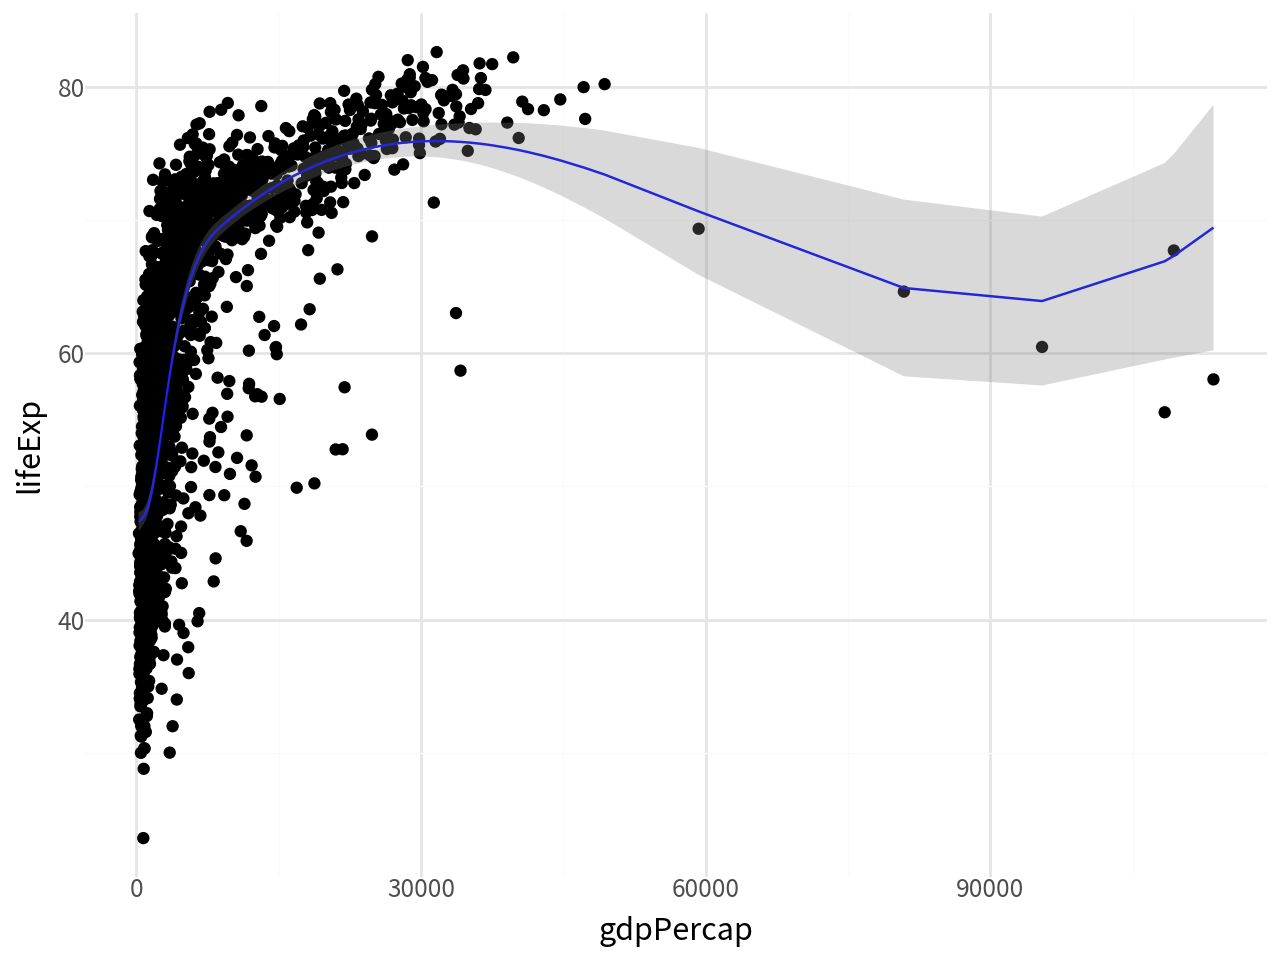

In [17]:
from statsmodels.formula.api import glmgam
from statsmodels.gam.api import CyclicCubicSplines

cs = CyclicCubicSplines(gapminder[['gdpPercap']], df=[4]) # TODO: Is it equal to ggplot2's default?

gam = glmgam(formula='lifeExp ~ gdpPercap', data=gapminder, smoother=cs).fit()

ggplot(
    pd.concat([gapminder,
               gam.get_prediction().summary_frame(alpha=.05)
              ], axis=1),
    aes(x = 'gdpPercap', y='lifeExp')
) + geom_point() + geom_line(aes(y='mean'), color='blue'
) + geom_ribbon(aes(ymin='mean_ci_lower', ymax='mean_ci_upper'), alpha=.3, fill='gray')

## 図 3.7

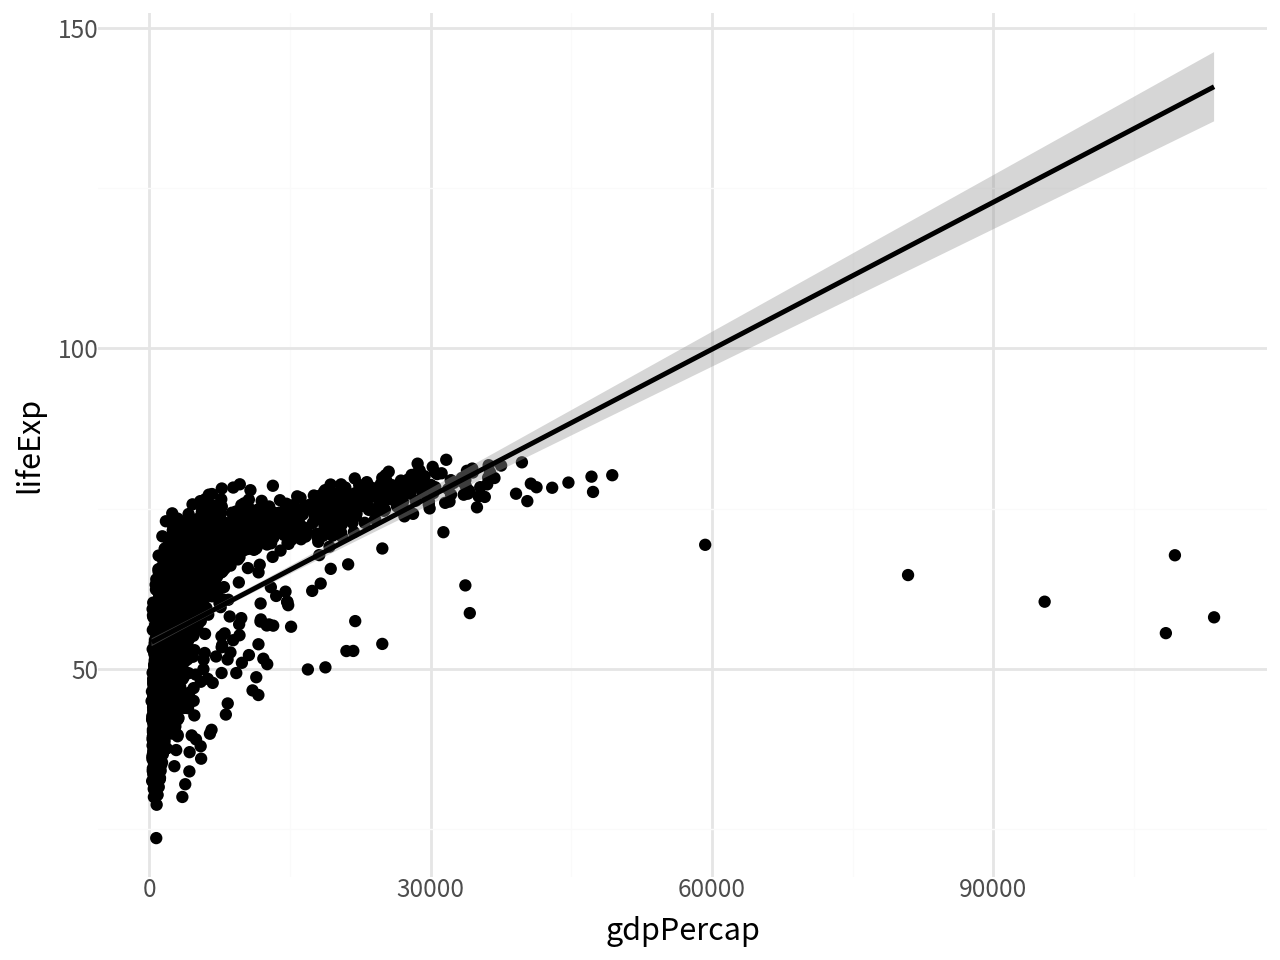

In [18]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth(method="lm")

## 図 3.8

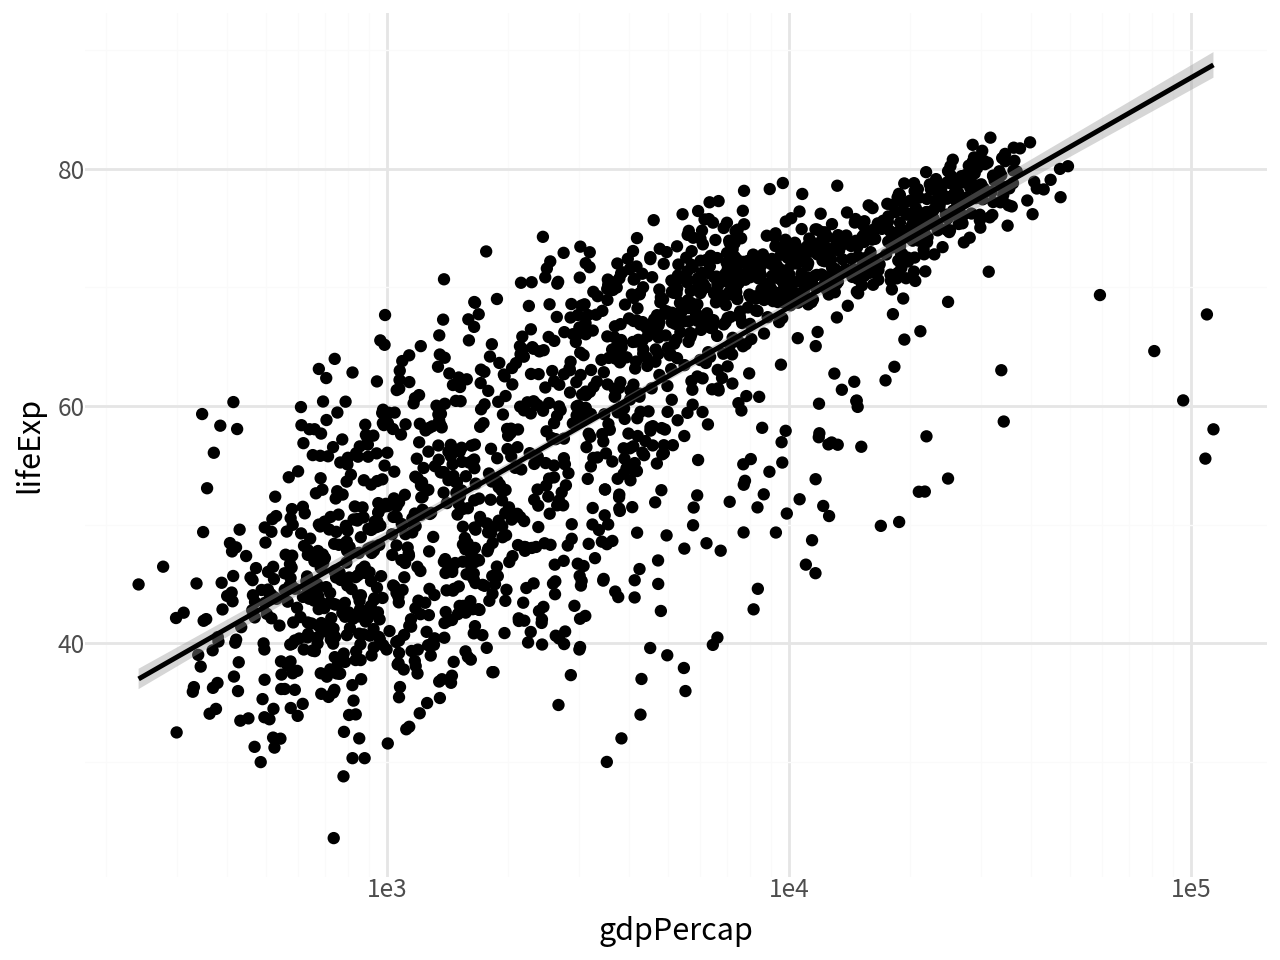

In [19]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth() + scale_x_log10()

## 図 3.9

注: **scales** パッケージは Python にはありませんが, **[mizani](https://mizani.readthedocs.io/en/stable/)** パッケージが同等の関数を提供しています. 例えば, `scales::dollar` は `mizani.labels.label_dollar` と同じです.

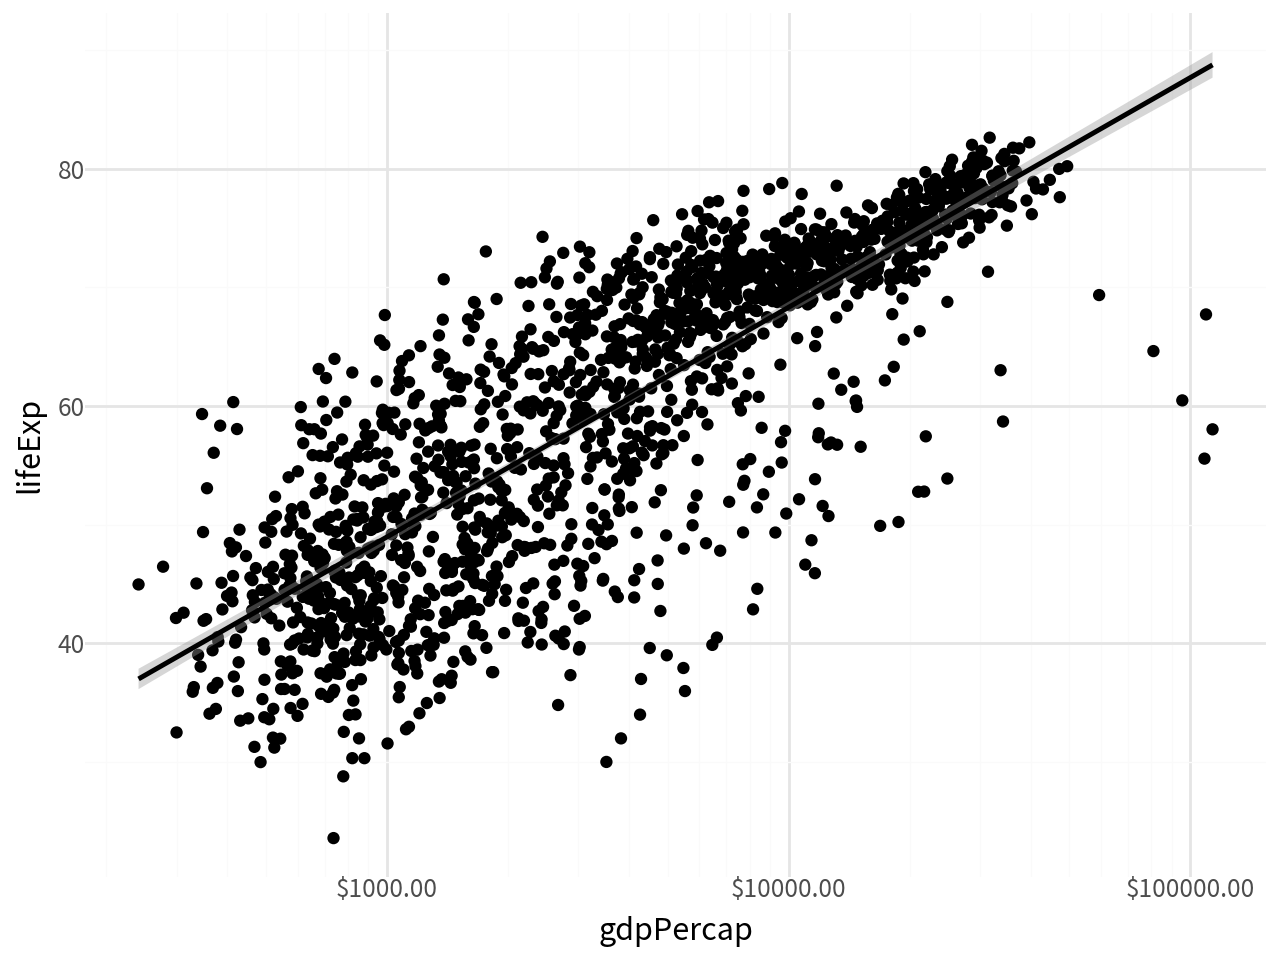

In [20]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point() + geom_smooth() + scale_x_log10(labels=label_dollar())

## 図 3.11

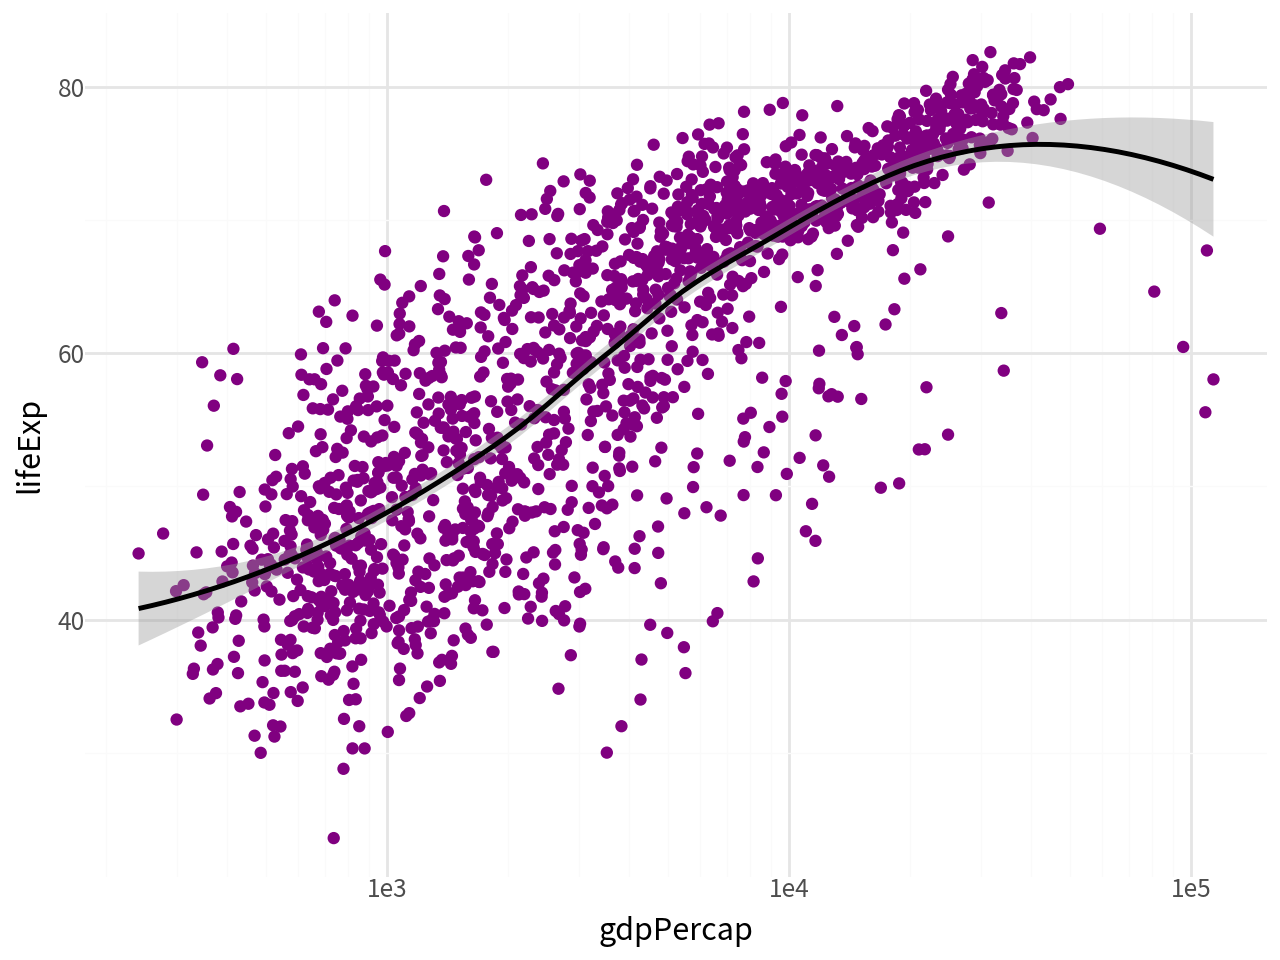

In [21]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(color='purple') + geom_smooth(method='loess') + scale_x_log10()

## 図 3.12

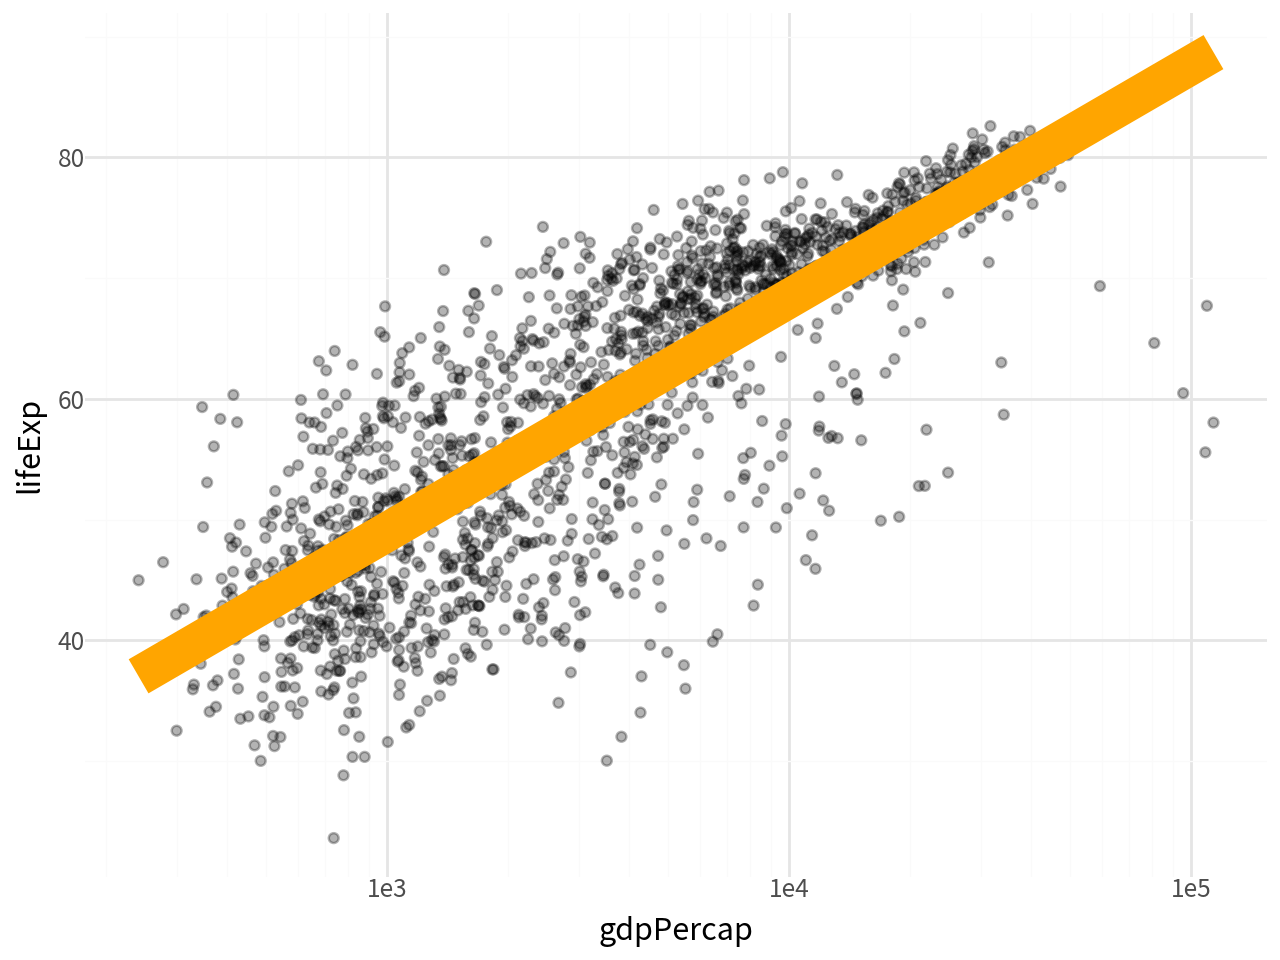

In [22]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(alpha=.3) + geom_smooth(
  color='orange', se=False, size=8, method='lm'
) + scale_x_log10()

## 図 3.13

注: Plotnine は現在 (v0.8) 副題 (subtitle) と注意書き (caption) の表示をサポートしていません. ここではこれらのテキストを `title` に結合することにします.

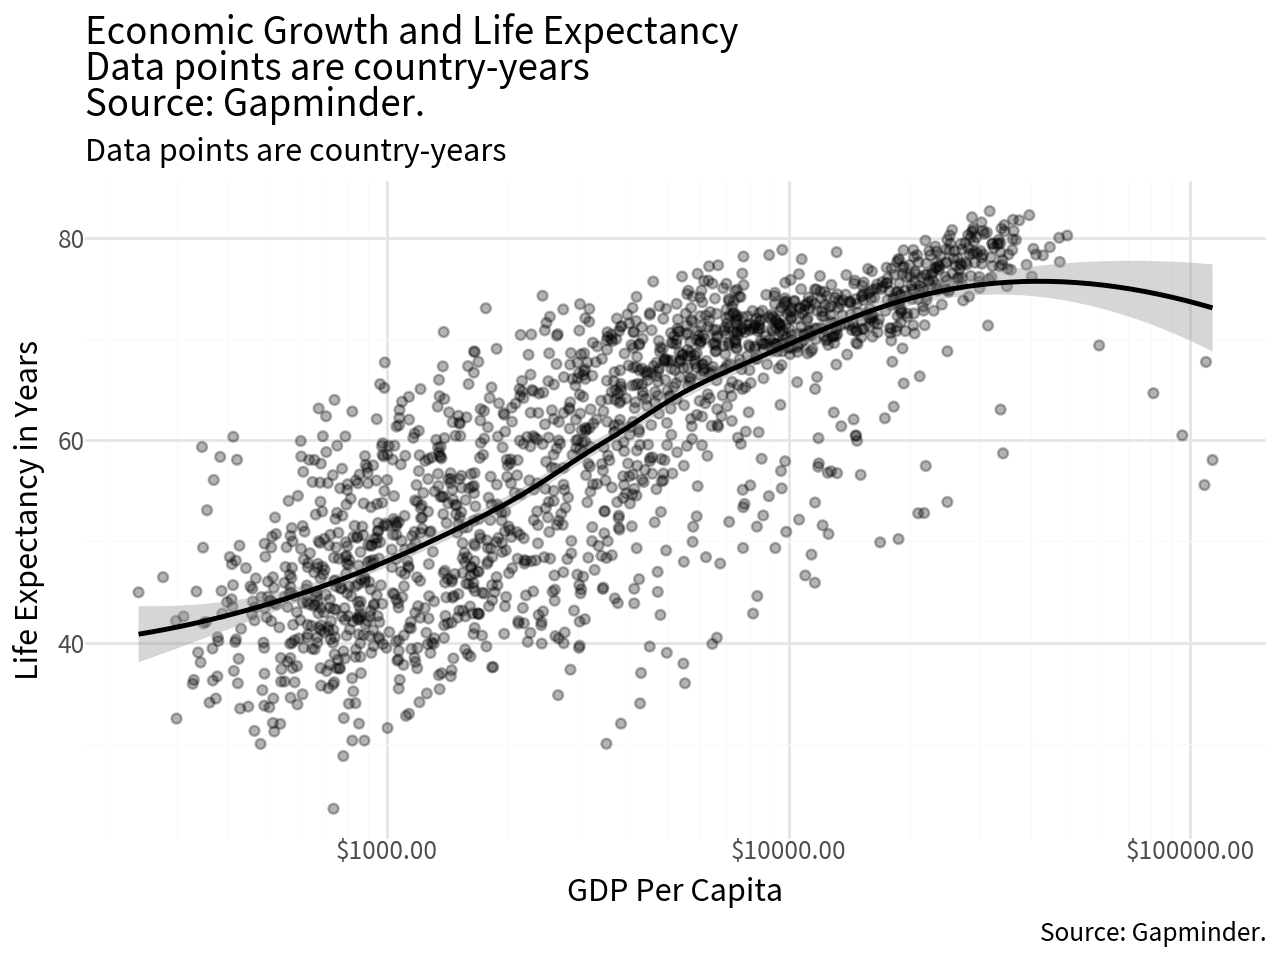

In [23]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(alpha=0.3) + geom_smooth(method='loess'
) + scale_x_log10(
  labels = label_dollar()
) + labs(
  x="GDP Per Capita",
  y="Life Expectancy in Years",
  title='\n'.join([
    "Economic Growth and Life Expectancy",
    "Data points are country-years",
    "Source: Gapminder."
  ]),
  subtitle="Data points are country-years",
  caption="Source: Gapminder."
)

## 図 3.14

注: **Plotnine** の現在 (v0.8) のデフォルトの質的カラーマッピングは **ggplot2** のデフォルトとは異なります (わずかに輝度が高いです). 以下のコードのように `scale_color_hue()` を追加することで調整できます. (しかし完全に同一ではありません). 輝度が低めのカラーマッピングを好むなら, `scale_color_cmap_d()` を使うというのも良い考えでしょう. 使用可能なカラーマッピングの一覧は [ここ](https://matplotlib.org/stable/tutorials/colors/colormaps.html) で確認できます. スケール関数は **ggplot2** とかなり異なります. 詳細は **plotnine** に関する appendix に注記します.

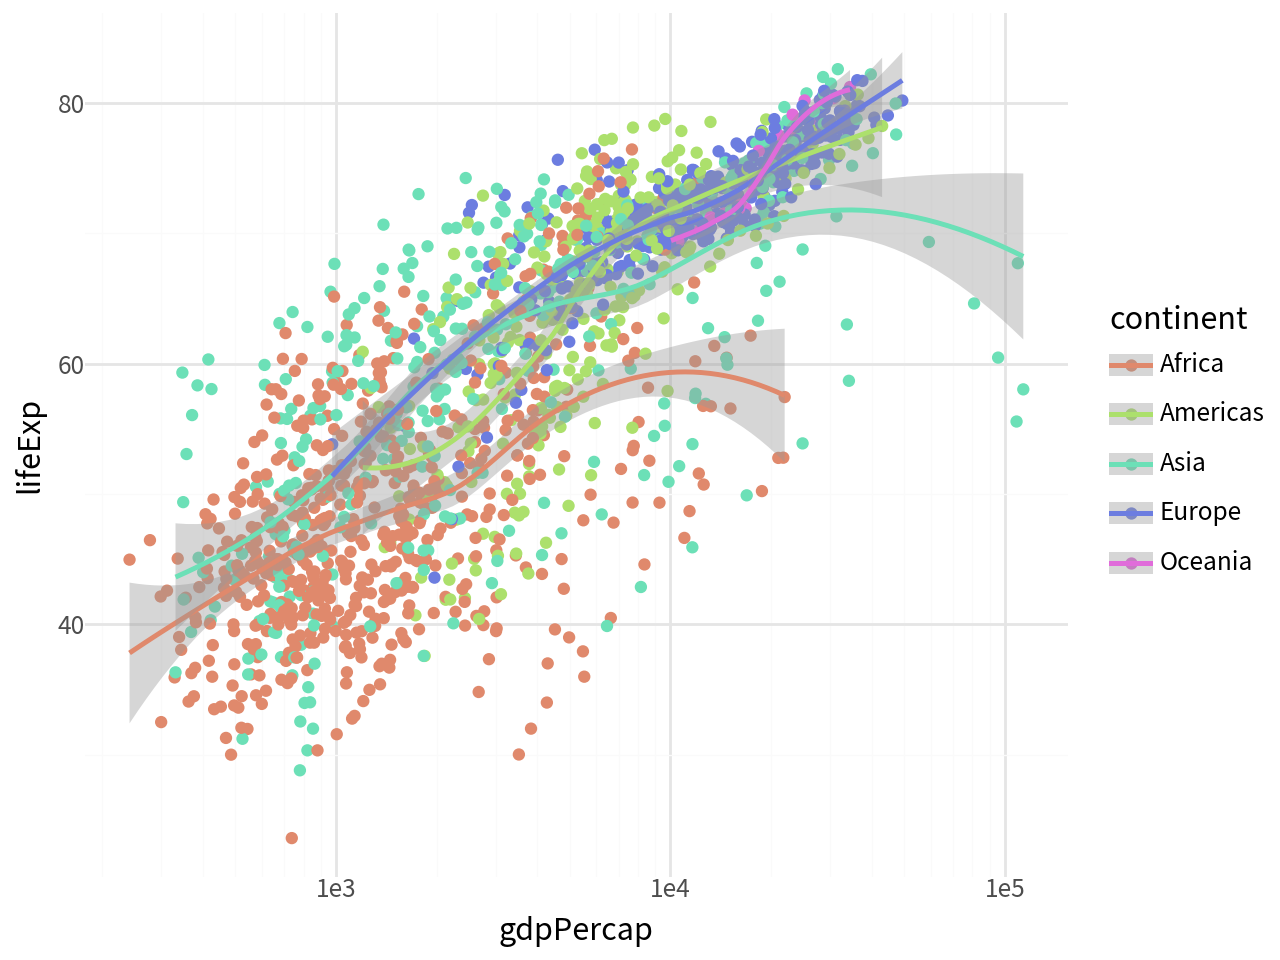

In [24]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp', color='continent'))
p + geom_point() + geom_smooth(method='loess'
) + scale_x_log10(
) + scale_color_hue(h=0.0416, l=0.65, s=.65)

## 図 3.15

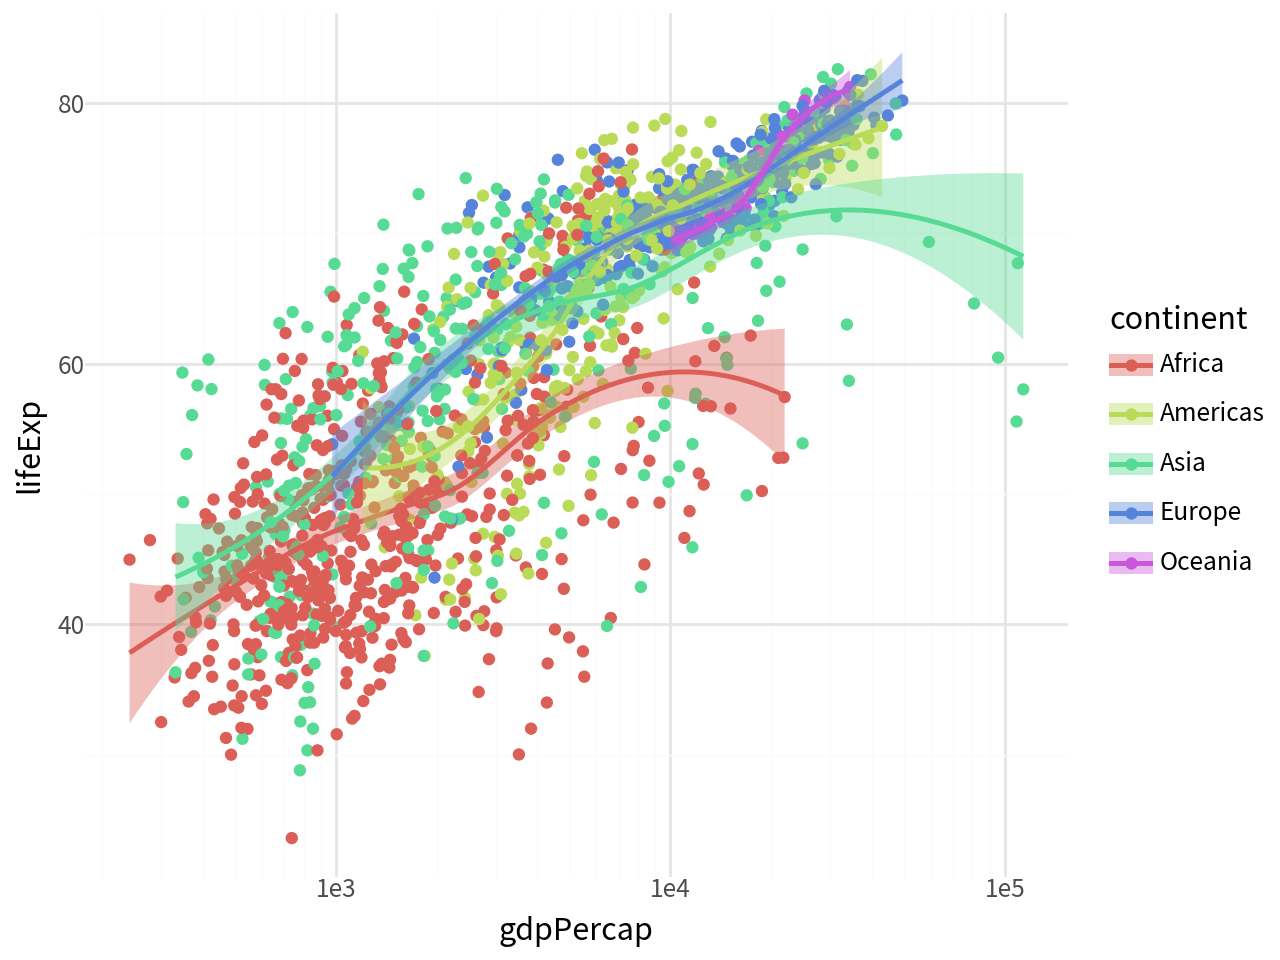

In [25]:
p = ggplot(
  gapminder,
  aes(x = 'gdpPercap', y='lifeExp', color='continent', fill='continent')
)
p + geom_point() + geom_smooth(method='loess') + scale_x_log10()

## 図 3.16

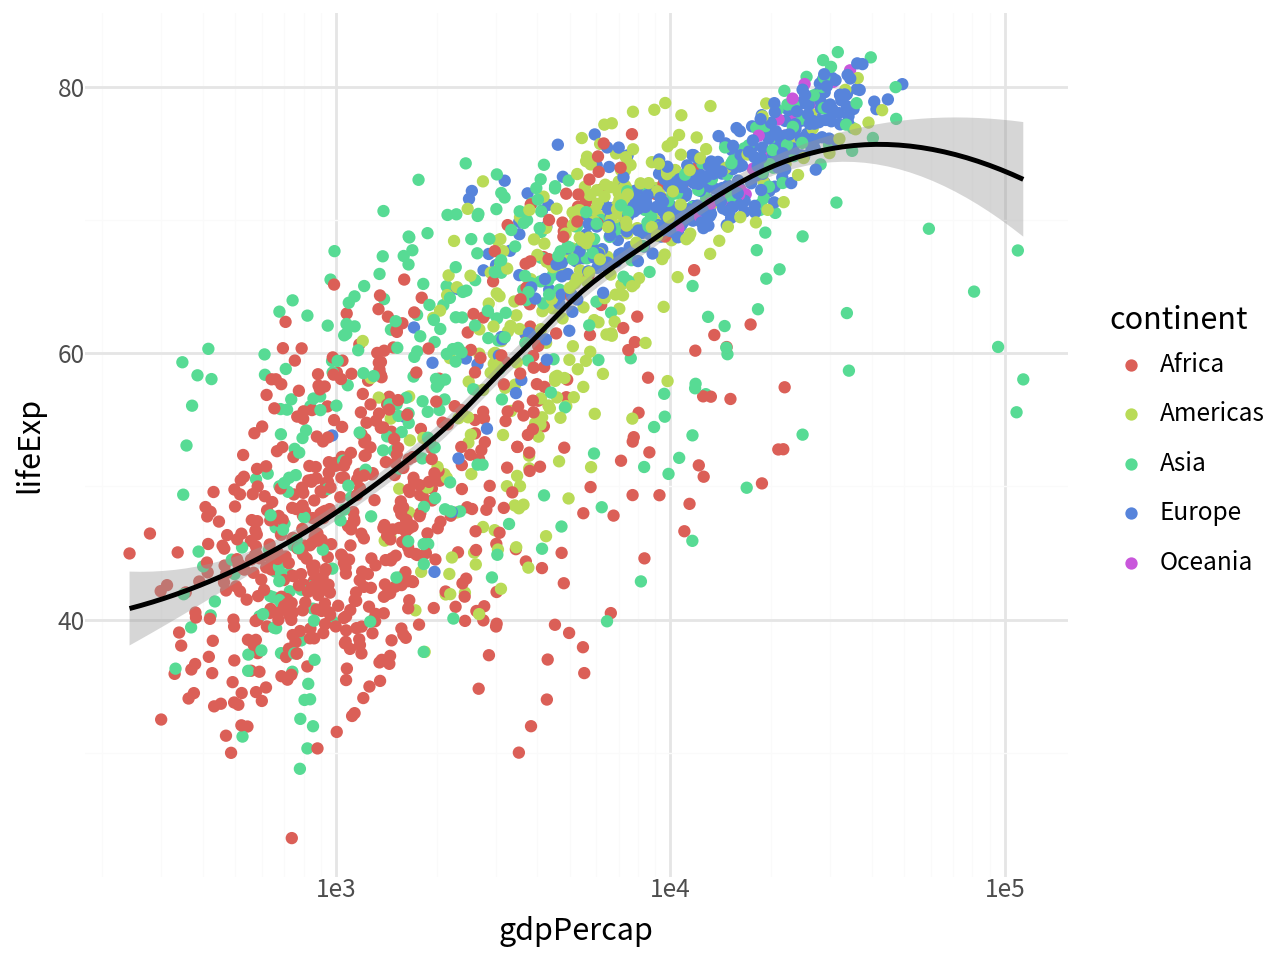

In [26]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(aes(color='continent')) + geom_smooth(method='loess'
) + scale_x_log10()

## 図 3.17

注 1: `aes()` 内の文字列は式として評価されます. Pandas の列名は numpy 配列として扱われます. そのため以下の例のように numpy 関数をこの中で使うことができます.

注 2: **Plotnine** の現在 (v0.8) のデフォルトの連続変数のカラーパレットは **ggplot2** のデフォルトとは異なります. **Plotnine** のデフォルトは `viridis` で, これは R での **viridis** パッケージによって提供されるものと同じです. **ggplot2** のデフォルトカラーのほうがよいと思うなら, 以下のコードのように `scale_color_continuous('Blues')` を追加することで変更できます. (ただし濃淡が逆転しています)

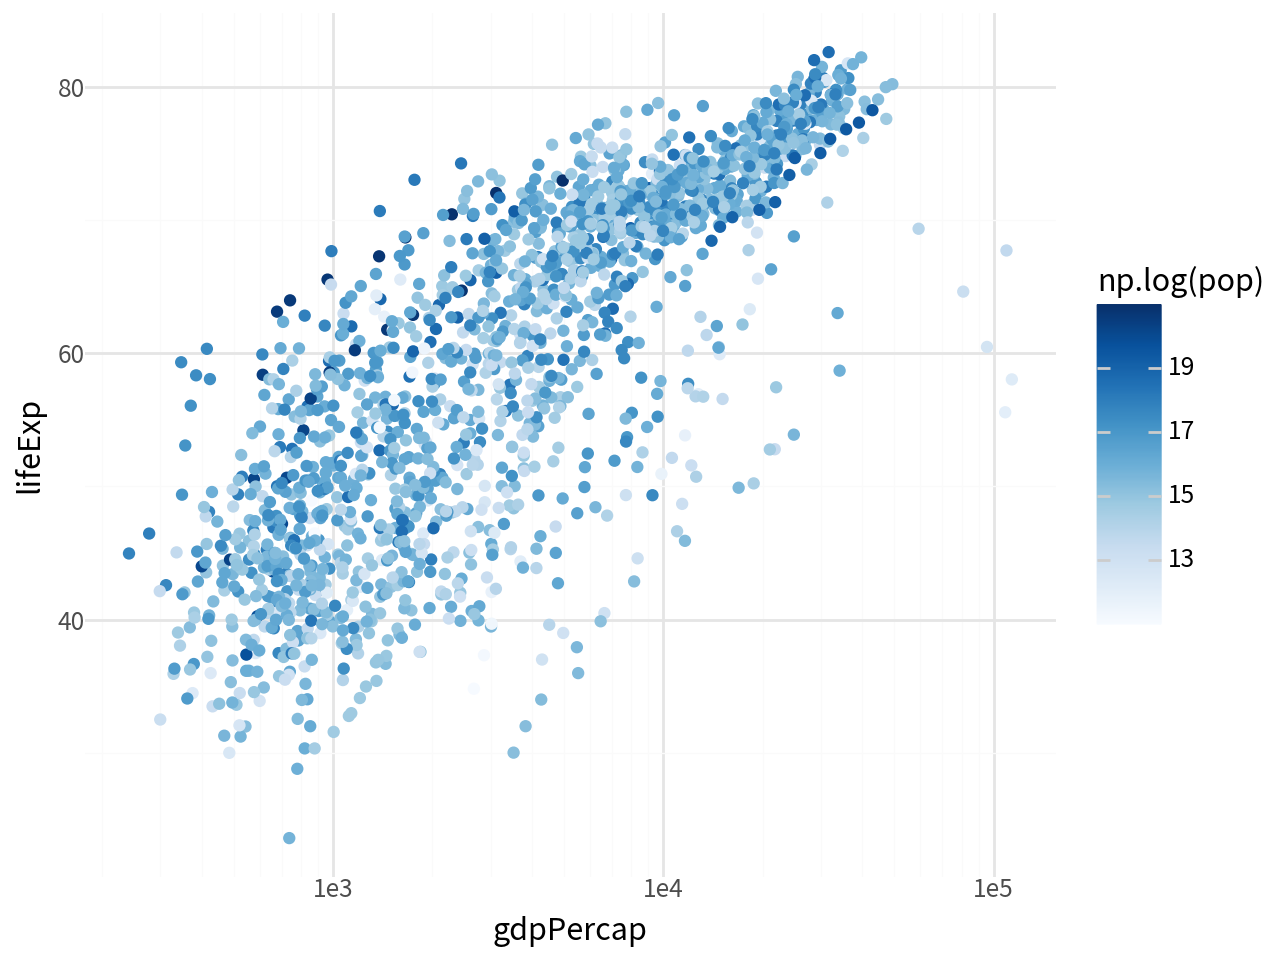

In [27]:
p = ggplot(gapminder, aes(x = 'gdpPercap', y='lifeExp'))
p + geom_point(aes(color='np.log(pop)')
) + scale_x_log10(
) + scale_color_continuous('Blues')

**Plotnine** のグラフィックを保存したいなら, `.save()` メソッドを使うことができます. デフォルトのサイズは `plotnine.options.figure_size = (WIDTH_IN_INCHES, HEIGHT_IN_INCHES)` で決定できます. デフォルトの値は  6.4 x 4.8 で, 単位はインチです. `theme(figure_size = (...))` で個別にサイズを指定することもできます.

In [28]:
(p + geom_point(aes(color='np.log(pop)')) + scale_x_log10()).save('plot1.png')

/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/ks/.pyenv/versions/3.9.10/lib/python3.9/site-packages/plotnine/ggplot.py:605: PlotnineWarning: Filename: plot1.png
